In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [ ]:
 mnist = tf.keras.datasets.mnist
 mnist

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>

In [ ]:
mnist_data = mnist.load_data()
type(mnist_data), len(mnist_data)

(tuple, 2)

In [ ]:
len(mnist_data[0]), len(mnist_data[1])

(2, 2)

In [ ]:
# unpacking

In [ ]:
((train_images, train_labels), (test_images, test_labels)) = mnist_data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0].shape

(28, 28)

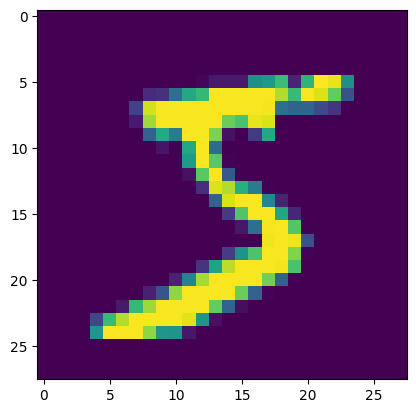

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_images[0].max(), train_images[0].min()

(np.uint8(255), np.uint8(0))

In [ ]:
train_images_compressed = train_images / 255.0
test_images_compressed = test_images / 255.0

In [ ]:
train_images_compressed[0].max(), train_images_compressed[0].min()

(np.float64(1.0), np.float64(0.0))

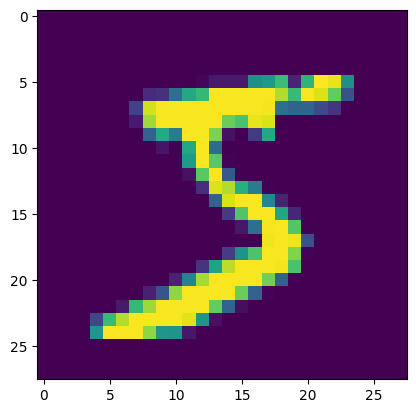

In [ ]:
plt.imshow(train_images_compressed[0])

# Varianta 1 - Classica (Fully Connected Network)

In [ ]:
train_images_compressed[0].flatten()[:3]

array([0., 0., 0.])

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [
        # tf.keras.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"), # Changed to 10 output neurons with softmax
    ]
)

model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Kept SparseCategoricalCrossentropy
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_1 = model_1.fit(train_images_compressed, train_labels, epochs=100, verbose=0)

In [ ]:
model_1.evaluate(test_images_compressed, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9600 - loss: 0.4188


[0.37401625514030457, 0.9646000266075134]

In [ ]:
predicted_images = model_1.predict([test_images_compressed])
predicted_images

125/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


array([[1.4749659e-35, 4.0862359e-28, 1.1182668e-19, ..., 9.9999994e-01,
        8.2598306e-23, 1.0415750e-21],
       [1.7936130e-38, 6.5752138e-25, 9.9999994e-01, ..., 0.0000000e+00,
        5.4260372e-35, 0.0000000e+00],
       [1.3049110e-25, 9.9999994e-01, 2.5589304e-13, ..., 8.1615842e-10,
        6.4316872e-14, 1.3686838e-24],
       ...,
       [0.0000000e+00, 3.9517848e-32, 0.0000000e+00, ..., 2.0560853e-27,
        4.3068621e-21, 3.2772977e-15],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.1146818e-17, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
predicted_images.shape, predicted_images.flatten().shape

((10000, 10), (100000,))

In [ ]:
test_labels.shape

(10000,)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
predicted_df = pd.DataFrame(predicted_images)
predicted_df

,0,1,2,3,4,5,6,7,8,9
0,1.474966e-35,4.086236e-28,1.118267e-19,1.413855e-14,1.058955e-28,1.198212e-32,0.000000e+00,9.999999e-01,8.259831e-23,1.041575e-21
1,1.793613e-38,6.575214e-25,9.999999e-01,5.255770e-26,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.426037e-35,0.000000e+00
2,1.304911e-25,9.999999e-01,2.558930e-13,1.047887e-23,7.565060e-15,5.322751e-28,1.345119e-29,8.161584e-10,6.431687e-14,1.368684e-24
3,9.999999e-01,1.183951e-31,4.390226e-24,0.000000e+00,8.871345e-16,1.161636e-31,1.418603e-26,8.790630e-16,0.000000e+00,1.018893e-18
4,2.541193e-18,1.692408e-22,4.445307e-18,6.755722e-26,9.994991e-01,4.674333e-22,1.193128e-21,6.854190e-16,1.008039e-21,5.007591e-04
...,...,...,...,...,...,...,...,...,...,...
9995,0.000000e+00,2.623485e-31,9.999999e-01,1.581204e-24,0.000000e+00,0.000000e+00,0.000000e+00,1.323010e-25,1.290293e-33,0.000000e+00
9996,0.000000e+00,0.000000e+00,1.267133e-27,9.999999e-01,0.000000e+00,2.000329e-19,0.000000e+00,0.000000e+00,1.510123e-34,2.650750e-36
9997,0.000000e+00,3.951785e-32,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,2.056085e-27,4.306862e-21,3.277298e-15
9998,0.000000e+00,0.000000e+00,0.000000e+00,2.278976e-31,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,1.114682e-17,0.000000e+00


In [ ]:
predicted_df = np.round(predicted_df, 2)
predicted_df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
predicted_df["real"] = test_labels
predicted_df

,0,1,2,3,4,5,6,7,8,9,real
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5


Varianta 2 - CNN (Convolutional Neural Network)

In [ ]:
train_images_compressed.shape

(60000, 28, 28)

In [ ]:
train_images_compressed_expanded = np.expand_dims(train_images_compressed, axis=-1)
train_images_compressed_expanded.shape

(60000, 28, 28, 1)

In [ ]:
cnn_model = tf.keras.Sequential(
    [
        # Un fel de preprocesare
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")


    ])

cnn_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Kept SparseCategoricalCrossentropy
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
cnn_model = cnn_model.fit(train_images_compressed_expanded, train_labels, epochs=5, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9973 - loss: 0.0082
Epoch 2/5
1765/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9976 - loss: 0.0074